In [119]:
import pandas as pd

# Create an empty DataFrame with appropriate columns
columns = ['Model', 'MSE', 'R2']
results = pd.DataFrame(columns=columns)

# Function to append new results as separate rows
def append_result(model, mse, r2):
    new_row = {
        'Model': model,
        'MSE': mse,
        'R2': r2,
    }
    global results
    results = results.append(new_row, ignore_index=True)


Data size:  (500, 1)
Output size:  (500, 1)
X max: 0.9979209289222291


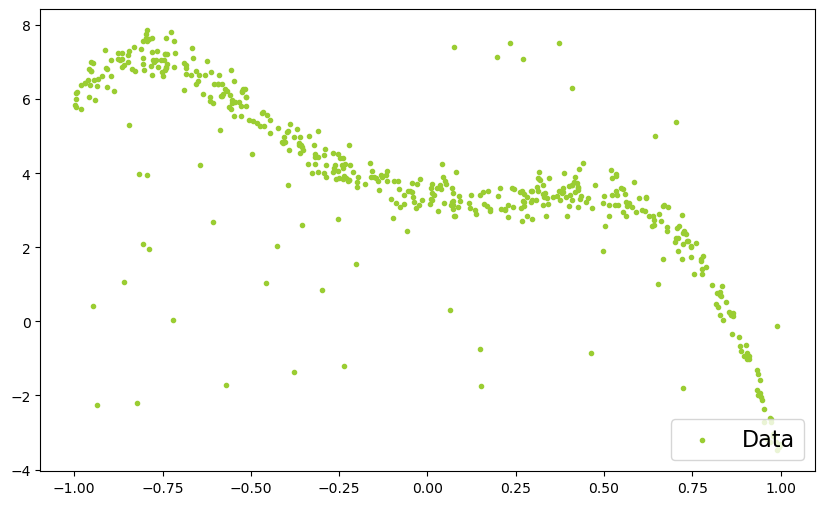

In [120]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16


# Assuming the data is saved as a tuple (X, y)
X, y = np.load("/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Assignment_1_IPB/data/e01_data.npy")

# Make sure the data is there
print('Data size: ', X.shape)
print('Output size: ', y.shape)
print ('X max:', X.max())
plt.scatter(X, y, color='yellowgreen', marker='.',label='Data')
plt.legend(loc='lower right')


# # Get the current working directory
# current_directory = os.getcwd()
# print('Current working directory:', current_directory)
# Save image
plt.savefig('../deliverable/images/scatter_plot.png')

In [121]:
from sklearn.model_selection import train_test_split

# Split the data in training, validation and test sets
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.1, random_state=7)

print('Max de X_train:', X_train.max())
print('# training samples: ', X_train.shape[0])
print('# validation samples: ', X_val.shape[0])
print('# test samples: ', X_test.shape[0])

Max de X_train: 0.9979209289222291
# training samples:  405
# validation samples:  45
# test samples:  50


MSE (validation set) linear model: 0.9780663914619002
R2 (validation set) linear model: 0.8408456893838137


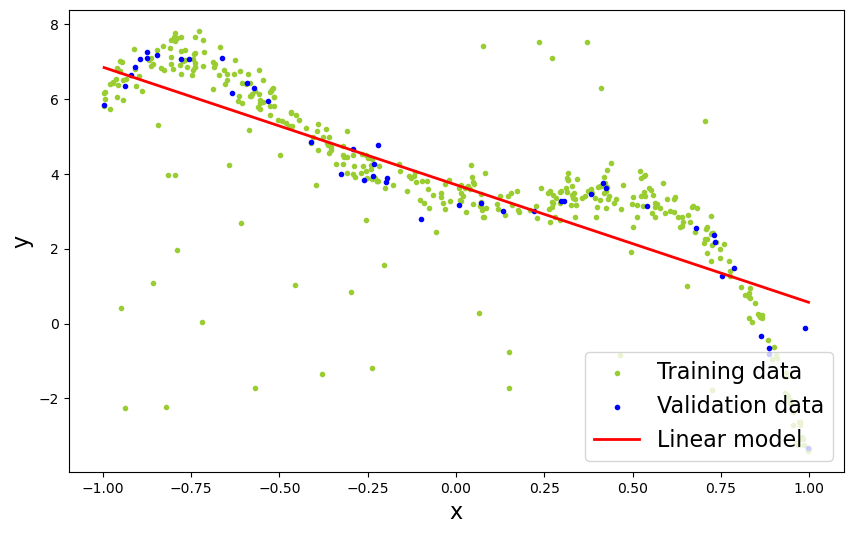

In [122]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score 
from sklearn.preprocessing import StandardScaler


# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = lr.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))


# Use the model to generate data to plot
line_X_to_plot = np.linspace(X_train.min(), X_train.max(), 100)[:, np.newaxis]
line_y_to_plot = lr.predict(line_X_to_plot)


plt.scatter(X_train, y_train, color='yellowgreen', marker='.',label='Training data')
plt.scatter(X_val, y_val, color='blue', marker='.',label='Validation data')
plt.plot(line_X_to_plot, line_y_to_plot, color='red', linewidth=2, label='Linear model')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

KNN with 1 neighbors
MSE (validation set): 4.014159401703337
R2 (validation set): 0.3468022438367728


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


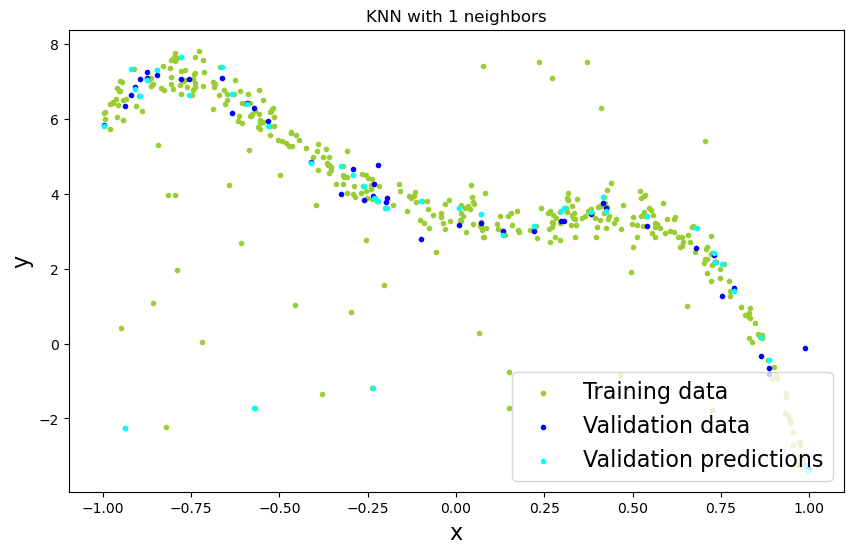

KNN with 5 neighbors
MSE (validation set): 0.7164959087564235
R2 (validation set): 0.8834093335453408


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


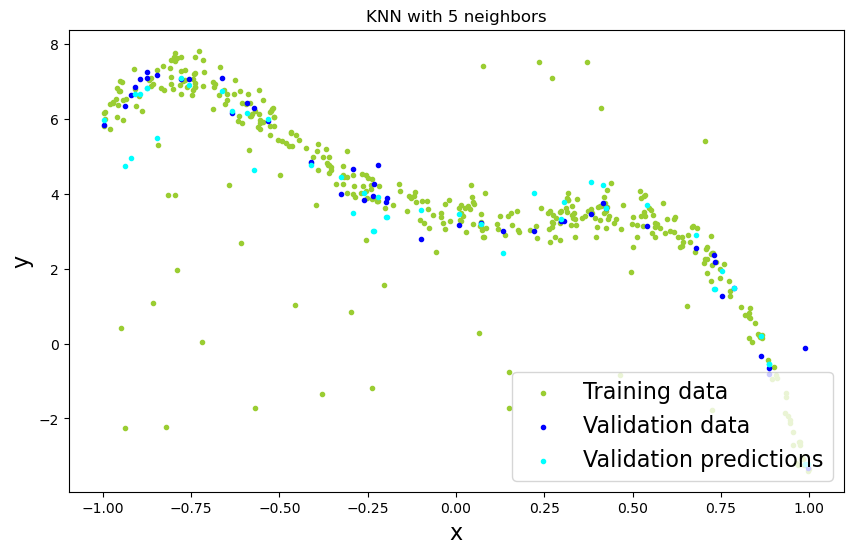

/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


KNN with 10 neighbors
MSE (validation set): 0.6227162343729523
R2 (validation set): 0.8986694831186258


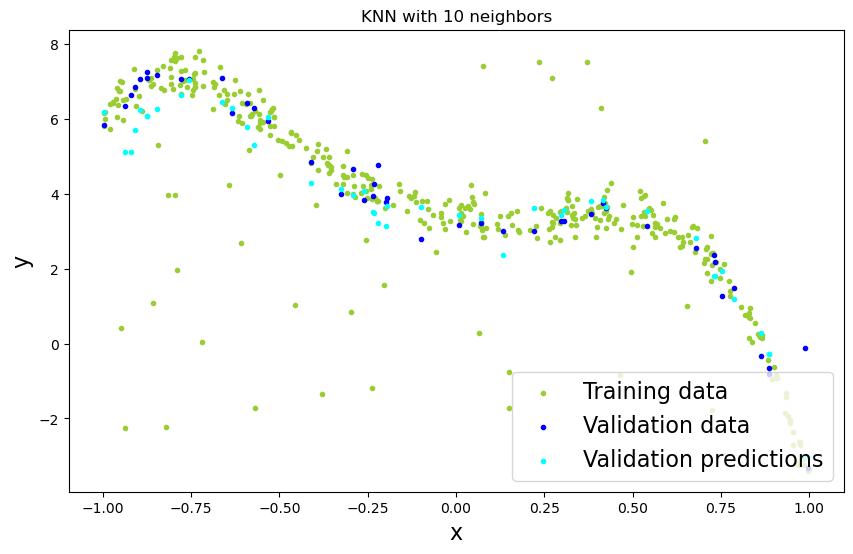

/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


KNN with 15 neighbors
MSE (validation set): 0.5363872242428974
R2 (validation set): 0.912717235104961


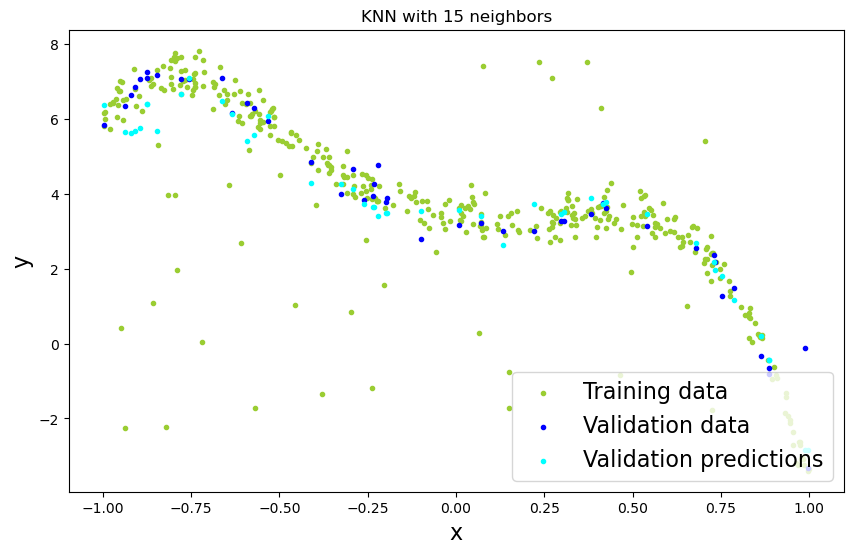

/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


KNN with 20 neighbors
MSE (validation set): 0.5411250423482779
R2 (validation set): 0.9119462811278393


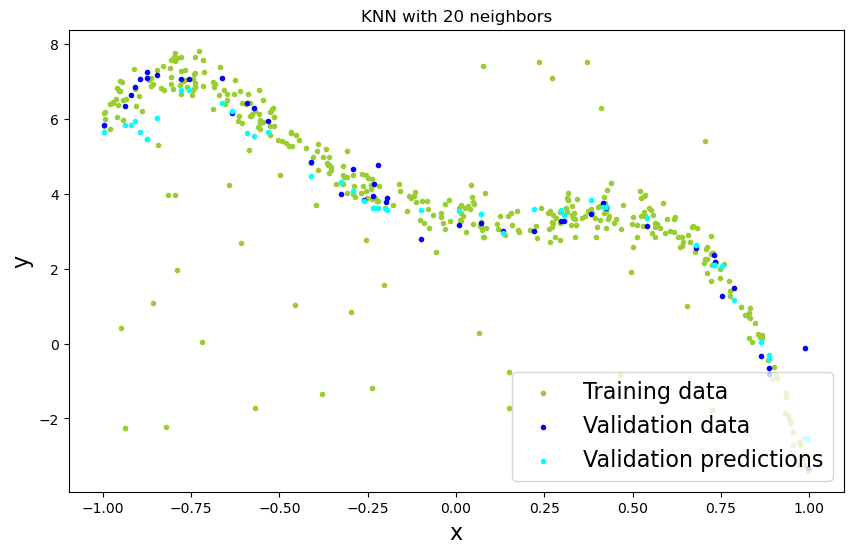

In [123]:
from sklearn import neighbors

# For several ks in knn
for n_neighbors in [1, 5, 10, 15,20]:
    
    # Fit a knn model
    knn = neighbors.KNeighborsRegressor(n_neighbors)
    knn.fit(X_train, y_train)
    
    # y_train_predicted = knn.predict(X_train)
    y_val_predicted = knn.predict(X_val)
    # rmse_train = mean_squared_error(y_train, y_train_predicted)
    mse_val = mean_squared_error(y_val, y_val_predicted)
    r2_val = r2_score(y_val, y_val_predicted)

    #results append
    append_result(f"KNN (k={n_neighbors})", mse_val, r2_val)
    
    
    # Print the results
    print(f'KNN with {n_neighbors} neighbors')
    print('MSE (validation set): {}'.format(mse_val))
    print('R2 (validation set): {}'.format(r2_val))
   


    plt.figure()
    plt.scatter(X_train, y_train, color='yellowgreen', marker='.', label='Training data')
    plt.scatter(X_val, y_val, color='blue', marker='.', label='Validation data')
    plt.scatter(X_val, y_val_predicted, color='cyan', marker='.', label='Validation predictions')
    plt.title(f'KNN with {n_neighbors} neighbors')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc='lower right')
    plt.show()

/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/Users/ignaciopastorebenaim/anaconda3/envs/CVISEnv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed 

Linear model
MSE (validation set): 0.9780663914619002
R2 (validation set): 0.8408456893838137
Huber model
MSE (validation set): 1.058902081519647
R2 (validation set): 0.8276918292403372
RANSAC model
MSE (validation set): 1.0662980346719686
R2 (validation set): 0.8264883344310043
Explained variance (validation set): 0.8441987450841744


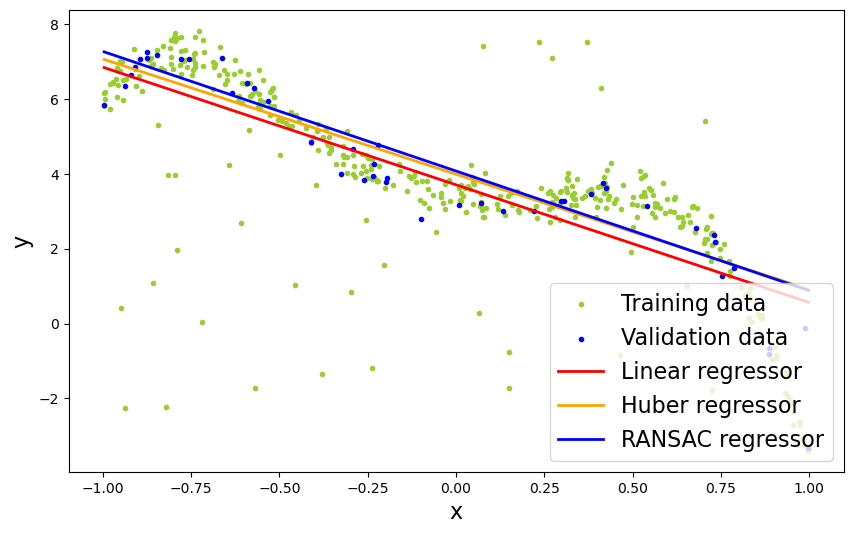

In [124]:
# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = lr.predict(X_val)
print('Linear model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))


append_result(f"Linear", mse_val, r2_val)

# Fit a Huber regression model
hu = linear_model.HuberRegressor()
hu.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = hu.predict(X_val)
print('Huber model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))

append_result(f"Huber", mse_val, r2_val)



# Fit a RANSAC regression model
ra = linear_model.RANSACRegressor()
ra.fit(X_train, y_train)
# Predict output for the validation data
y_val_predicted = ra.predict(X_val)
print('RANSAC model')
# Compute metrics in the validation data
mse_val = mean_squared_error(y_val, y_val_predicted)
print('MSE (validation set): {}'.format(mse_val))
r2_val = r2_score(y_val, y_val_predicted)
print('R2 (validation set): {}'.format(r2_val))
ev_val = explained_variance_score(y_val, y_val_predicted)
print('Explained variance (validation set): {}'.format(ev_val))

append_result(f"RANSAC", mse_val, r2_val)

# Use the model to generate data to plot
line_X_to_plot = np.linspace(X_train.min(), X_train.max(), 100)[:, np.newaxis]
line_y = lr.predict(line_X_to_plot)
line_y_huber = hu.predict(line_X_to_plot)
line_y_ransac = ra.predict(line_X_to_plot)

lw = 2
plt.scatter(X_train, y_train, color='yellowgreen', marker='.',label='Training data')
plt.scatter(X_val, y_val, color='blue', marker='.', label='Validation data')
plt.plot(line_X_to_plot, line_y, color='red', linewidth=lw, label='Linear regressor')
plt.plot(line_X_to_plot, line_y_huber, color='orange', linewidth=lw, label='Huber regressor')
plt.plot(line_X_to_plot, line_y_ransac, color='blue', linewidth=lw, label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


Polinomial degree: 2
Polynomial model with degree:  2
MSE (validation set): 1.0015247667740192
R2 (validation set): 0.8370284622675688
Ridge model model with degree:  2
MSE (validation set): 1.0035222288436536
R2 (validation set): 0.8367034284033549
Lasso model model with degree:  2
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


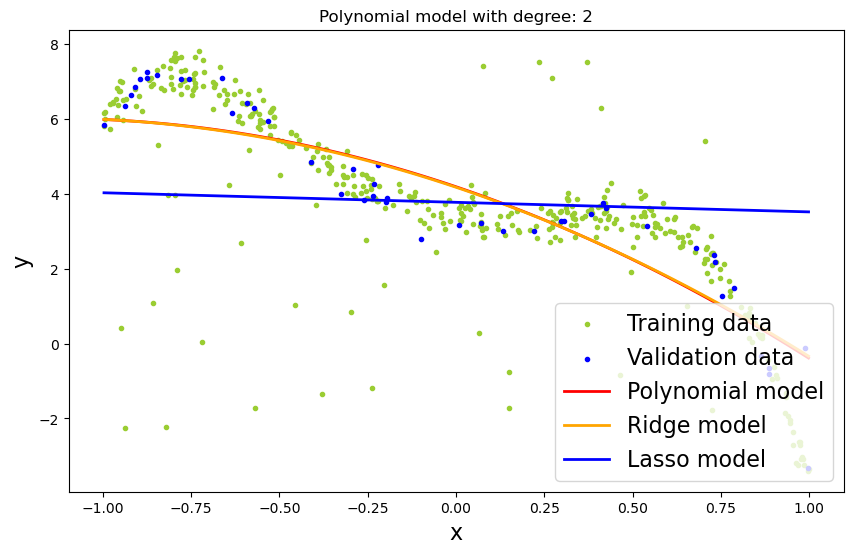

Polinomial degree: 3
Polynomial model with degree:  3
MSE (validation set): 0.7570426665285338
R2 (validation set): 0.8768114263508238
Ridge model model with degree:  3
MSE (validation set): 0.7472625004469053
R2 (validation set): 0.8784028884478976
Lasso model model with degree:  3
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


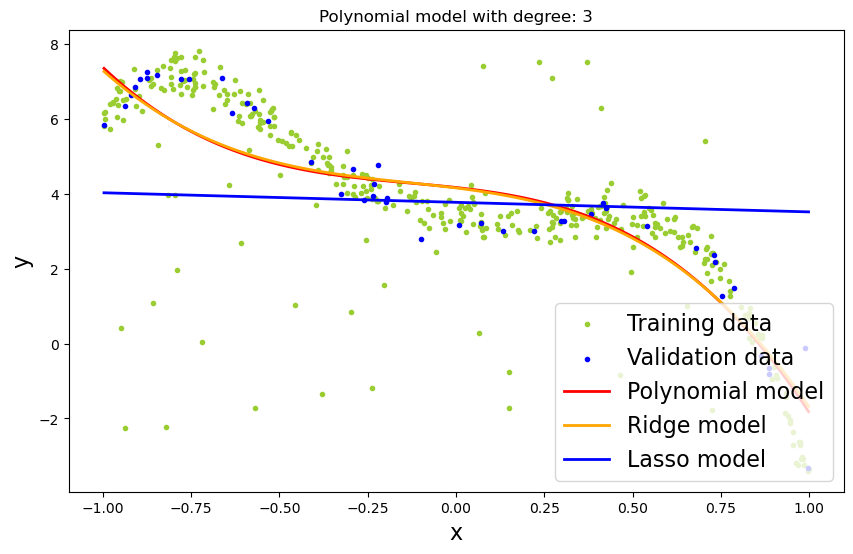

Polinomial degree: 4
Polynomial model with degree:  4
MSE (validation set): 0.4474921534910636
R2 (validation set): 0.9271825452579237
Ridge model model with degree:  4
MSE (validation set): 0.4493625604029661
R2 (validation set): 0.9268781862438176
Lasso model model with degree:  4
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


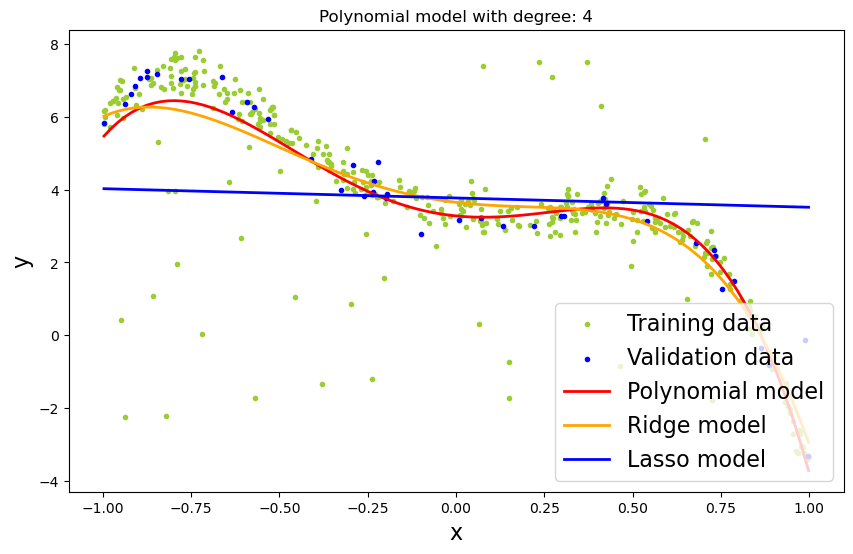

Polinomial degree: 5
Polynomial model with degree:  5
MSE (validation set): 0.43539679708767215
R2 (validation set): 0.9291507430478114
Ridge model model with degree:  5
MSE (validation set): 0.4734607839367937
R2 (validation set): 0.9229568408350786
Lasso model model with degree:  5
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


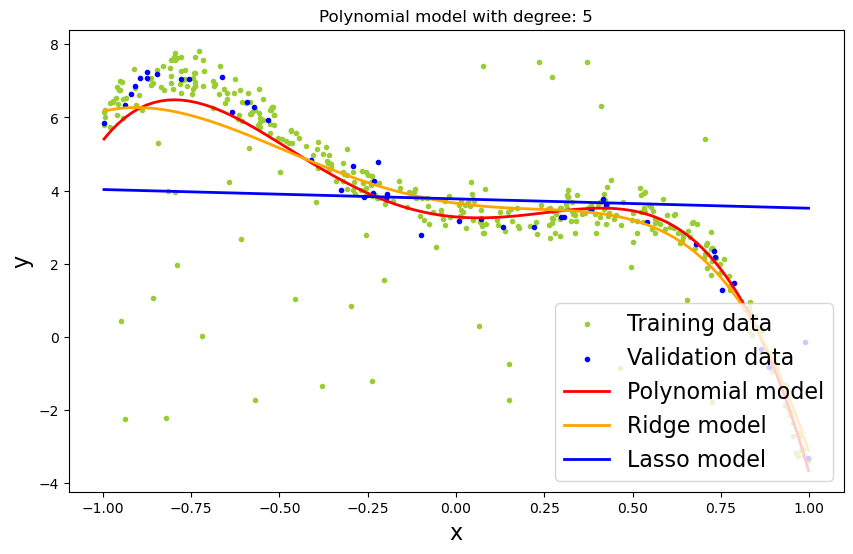

Polinomial degree: 6
Polynomial model with degree:  6
MSE (validation set): 0.42459760114612516
R2 (validation set): 0.9309080251712847
Ridge model model with degree:  6
MSE (validation set): 0.48093756474799976
R2 (validation set): 0.9217401934724622
Lasso model model with degree:  6
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


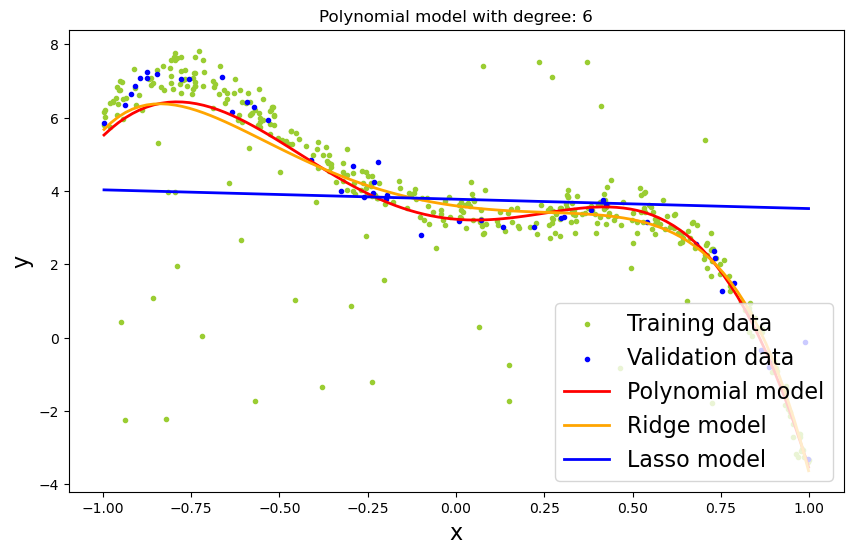

Polinomial degree: 7
Polynomial model with degree:  7
MSE (validation set): 0.5086628021772996
R2 (validation set): 0.9172286479493256
Ridge model model with degree:  7
MSE (validation set): 0.48823401398354366
R2 (validation set): 0.920552890281016
Lasso model model with degree:  7
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


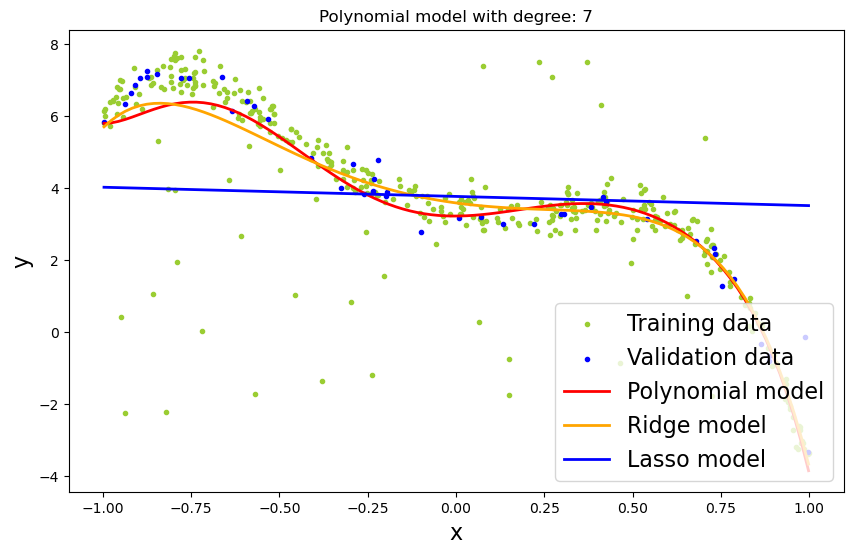

Polinomial degree: 8
Polynomial model with degree:  8
MSE (validation set): 0.5105928005848424
R2 (validation set): 0.9169145920030992
Ridge model model with degree:  8
MSE (validation set): 0.5128464278806771
R2 (validation set): 0.9165478740565615
Lasso model model with degree:  8
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


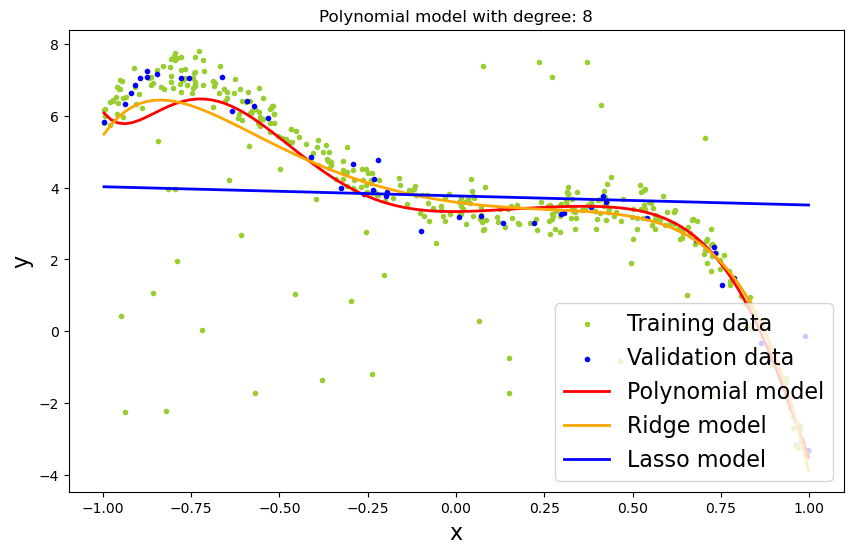

Polinomial degree: 9
Polynomial model with degree:  9
MSE (validation set): 0.5647671700199434
R2 (validation set): 0.9080991531987632
Ridge model model with degree:  9
MSE (validation set): 0.5153848009381938
R2 (validation set): 0.9161348213051507
Lasso model model with degree:  9
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


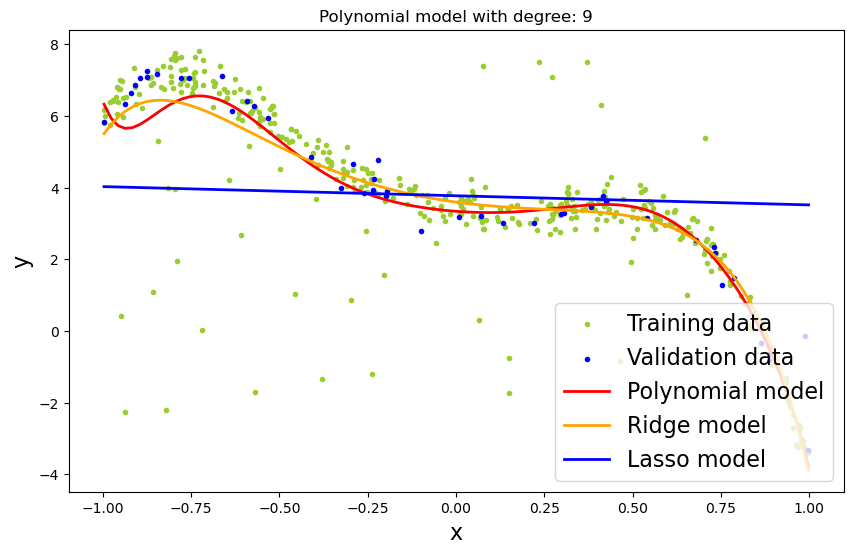

/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


Polinomial degree: 10
Polynomial model with degree:  10
MSE (validation set): 0.5618706939758478
R2 (validation set): 0.9085704776937449
Ridge model model with degree:  10
MSE (validation set): 0.5264480586226905
R2 (validation set): 0.9143345701511227
Lasso model model with degree:  10
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


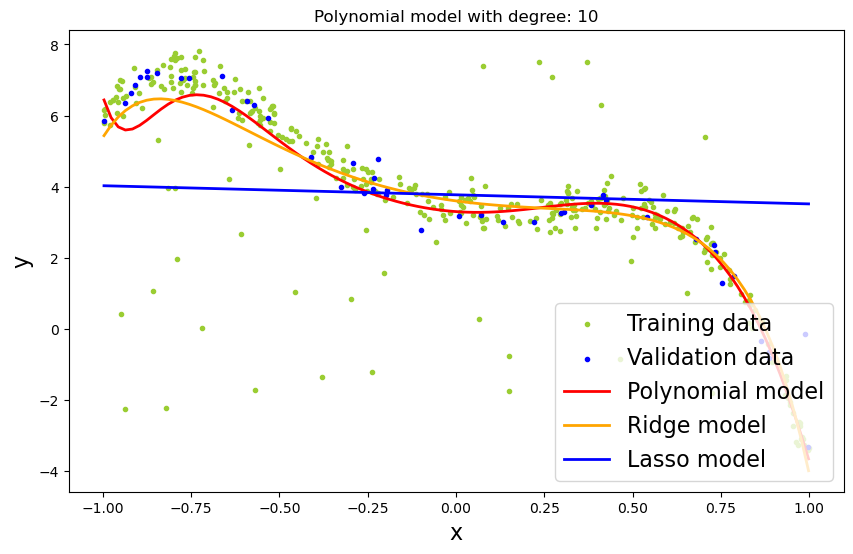

Polinomial degree: 11
Polynomial model with degree:  11
MSE (validation set): 0.5421780192930458
R2 (validation set): 0.9117749371156104
Ridge model model with degree:  11
MSE (validation set): 0.5293842251234936
R2 (validation set): 0.9138567870891864
Lasso model model with degree:  11
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


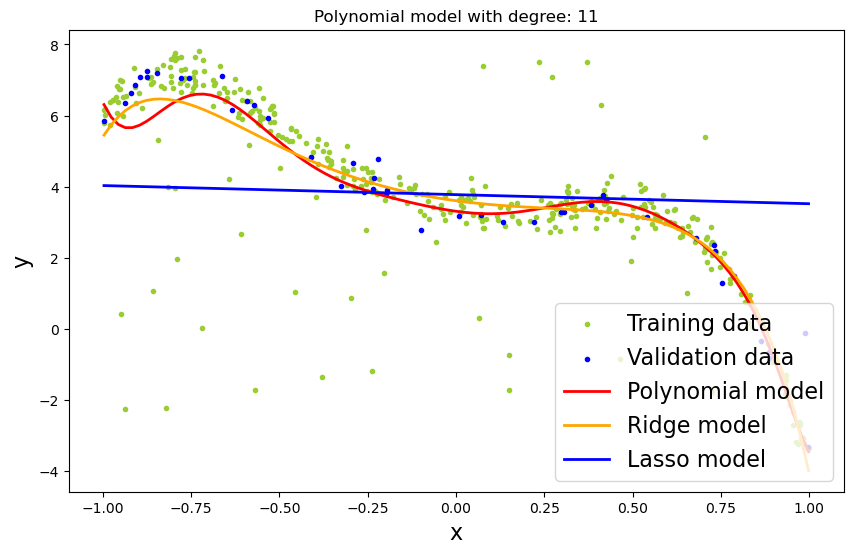

Polinomial degree: 12
Polynomial model with degree:  12
MSE (validation set): 0.5436966270227481
R2 (validation set): 0.9115278240684522
Ridge model model with degree:  12
MSE (validation set): 0.5284046044632713
R2 (validation set): 0.9140161943157347
Lasso model model with degree:  12
MSE (validation set): 5.45950333890409
R2 (validation set): 0.11161093173714698


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/2315121715.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


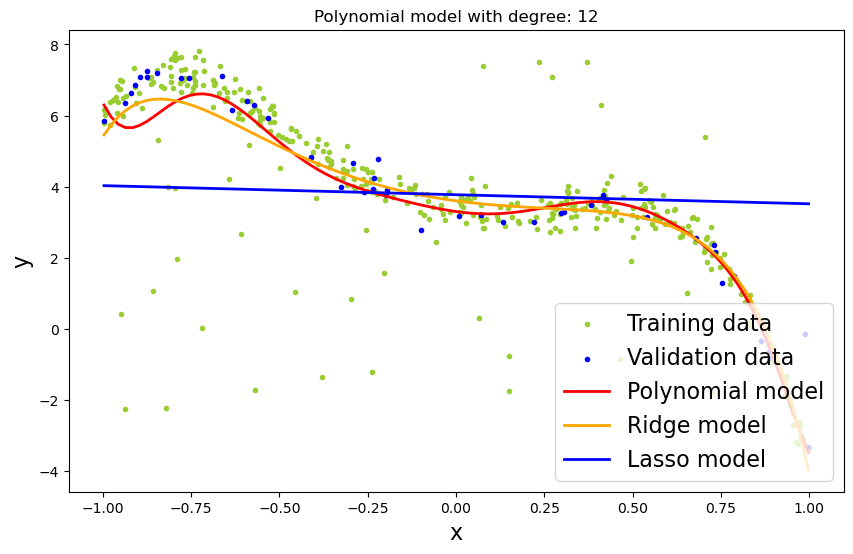

In [125]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

degrees = [2,3,4,5,6,7,8,9,10,11,12]

for degree in degrees: 
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    print ('Polinomial degree:', degree)
    lr = linear_model.LinearRegression()
    lr.fit(X_poly, y_train)
    # Predict output for the validation data
    y_val_predicted = lr.predict(X_poly_val)
    print('Polynomial model with degree: ', degree)
    # Compute metrics in the validation data
    mse_val = mean_squared_error(y_val, y_val_predicted)
    print('MSE (validation set): {}'.format(mse_val))
    r2_val = r2_score(y_val, y_val_predicted)
    print('R2 (validation set): {}'.format(r2_val))

    append_result(f"Polynomial (degree={degree})", mse_val, r2_val)

    #Ridge
    lamba_ridge_lasso = 1.0

    rr = linear_model.Ridge(alpha=lamba_ridge_lasso)
    rr.fit(X_poly, y_train)
    # Predict output for the validation data
    y_val_predicted = rr.predict(X_poly_val)
    print('Ridge model model with degree: ', degree)
    # Compute metrics in the validation data
    mse_val = mean_squared_error(y_val, y_val_predicted)
    print('MSE (validation set): {}'.format(mse_val))
    r2_val = r2_score(y_val, y_val_predicted)
    print('R2 (validation set): {}'.format(r2_val))

    append_result(f"Ridge (degree={degree}, $\lambda={lamba_ridge_lasso}$)", mse_val, r2_val)

    #Lasso
    lasso = linear_model.Lasso(alpha=lamba_ridge_lasso)
    lasso.fit(X_poly, y_train)
    y_val_predicted = lasso.predict(X_poly_val)
    print('Lasso model model with degree: ', degree)
    # Compute metrics in the validation data
    mse_val = mean_squared_error(y_val, y_val_predicted)
    print('MSE (validation set): {}'.format(mse_val))
    r2_val = r2_score(y_val, y_val_predicted)
    print('R2 (validation set): {}'.format(r2_val))
    

    append_result(f"Lasso (degree={degree}, $\lambda={lamba_ridge_lasso}$)", mse_val, r2_val)
    
    # Use the model to generate data to plot
    linspace_X = np.linspace(X.min(), X.max(), num=100)[:, np.newaxis]
    linspace_X_poly = poly.fit_transform(linspace_X)
    linspace_y_lr = lr.predict(linspace_X_poly)
    linspace_y_rr = rr.predict(linspace_X_poly)
    linspace_y_lasso = lasso.predict(linspace_X_poly)

    #plot the data and the model
    plt.scatter(X_train, y_train, color='yellowgreen', marker='.',label='Training data')
    plt.scatter(X_val, y_val, color='blue', marker='.', label='Validation data')
    plt.plot(linspace_X, linspace_y_lr, color='red', linewidth=2, label='Polynomial model')
    plt.plot(linspace_X, linspace_y_rr, color='orange', linewidth=2, label='Ridge model')
    plt.plot(linspace_X, linspace_y_lasso, color='blue', linewidth=2, label='Lasso model')
    plt.legend(loc='lower right')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f'Polynomial model with degree: {degree}')
    plt.show()

In [126]:
# Convert to LaTeX with custom formatting
latex_table = results[['Model', 'MSE', 'R2']].to_latex(index=False, 
    column_format='|l|l|c|c|',  # Custom column alignment and borders
    float_format="%.3f",         # Ensure floating point numbers use 3 decimals
    bold_rows=True,              # Bold the header row
    longtable=False,             # Use standard table format
    caption="Model Performance with MSE and R²",  # Add caption
    label="tab:model_performance", # Add label for referencing
    escape=False                # Prevent LaTeX special characters from being escaped
)


# Save the table to a file
with open('../deliverable/tables/results.tex', 'w') as f:
    f.write(latex_table)


/var/folders/lr/4s66tsbj6cx4x6tpdr7mwkzc0000gn/T/ipykernel_52670/654428637.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = results[['Model', 'MSE', 'R2']].to_latex(index=False,
